In [ ]:
'''

Polynominal Regression:
    - What If straight line in the Linear regression is unable to capture the patterns in the data (this is called 
      as underfitting). To overcome this we need to increase the complexity of the model.
    - To generate a higher order equation we can add powers of the original features as new features in The linear model.
    - Y = theta0 + theta1X  ---->  Y = theta0 + theta1X + theta2X(Square)
    - The original features are converted into Polynomial features of required degree (2,3,..,n) 
    
When do we go for Polynominal Regression
    - where data points are arranged in a non-linear fashion, we need the Polynomial Regression model.

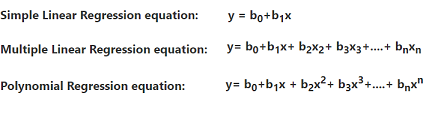

### Understanding need of Polynominal Regression :
#### Example 1

In [ ]:
### Simple Linear Regression will not Identify the pattern in the data where it is non-linear fashion

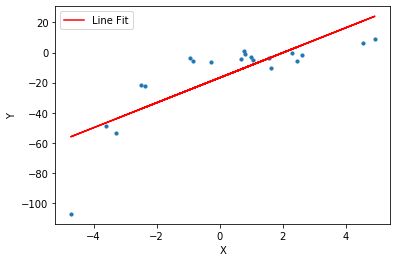

In [13]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r',label = "Line Fit")
plt.legend();plt.xlabel("X");plt.ylabel("Y");plt.show()

# We can see that the straight line is unable to capture the patterns in the data. 
# This is an example of under-fitting. Computing the RMSE and R²-score of the linear line gives:
# RMSE of linear regression is 15.908242501429998.
# R2 score of linear regression is 0.6386750054827146

In [14]:
# To overcome under-fitting, we need to increase the complexity of the model.
# To generate a higher order equation we can add powers of the original features as new features. The linear model,

# Y = theta0 + theta1X  ---->  Y = theta0 + theta1X + theta2X(Square)

10.120437473614711
0.8537647164420812


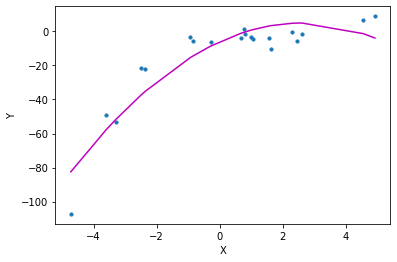

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Introducing Degree of 2
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

# Instead of X we are using X_poly
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m');plt.xlabel("X");plt.ylabel("Y")
plt.show()

### Understanding need of Polynominal Regression :
#### Example 2

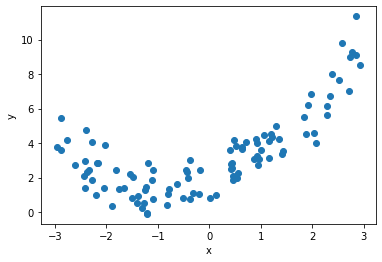

[-1.10742989]
[-1.10742989  1.22640097]
Linear Regression Intercept: [1.8637839]
Linear Regression Coefficeint: [[0.98310808 0.55071775]]


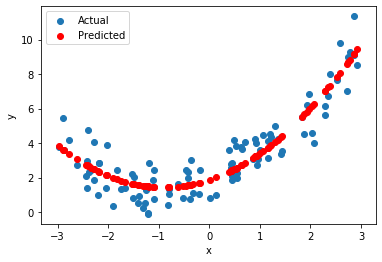

In [20]:
# What if your data is actually more complex than a simple straight line? Surprisingly,
# you can actually use a linear model to fit nonlinear data. A simple way to do this is to
# add powers of each feature as new features, then train a linear model on this extended
# set of features. This technique is called Polynomial Regression.

import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
# nomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the 
# training set as new features (in this case there is just one feature):

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

print("Linear Regression Intercept:",lin_reg.intercept_)
print("Linear Regression Coefficeint:",lin_reg.coef_)

pred_values = lin_reg.predict(X_poly)

plt.scatter(X,y,label="Actual")
plt.scatter(X,pred_values,color='r',label="Predicted")
plt.xlabel("x");plt.ylabel("y");plt.legend()

plt.show()

### Polynomial Feature Generation

In [19]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures

# get the data
x = np.array([1,2,3,4,5,6])

# Define the Degree of 5
poly = PolynomialFeatures(degree=5,interaction_only=False)

# Fit the Model
polynominal =  poly.fit_transform(x.reshape(-1,1))

# Convert to Data Frame along with column
pd.DataFrame(polynominal,columns=['','X*1','X*2','X*3','X*4','X*5'])

,,X*1,X*2,X*3,X*4,X*5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0,32.0
2,1.0,3.0,9.0,27.0,81.0,243.0
3,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.0,6.0,36.0,216.0,1296.0,7776.0
